## Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import os
import pickle
import time
import random
import colorsys

import MultiClass_CPILS

import warnings
warnings.filterwarnings("ignore")

In [2]:
LS_PATH="./LatentSpaces/"
DS_PATH="./dataset/MultiClass/"
TEST_PATH="./tests/MultiClass/"

### Check point -- reload the pre-processed dataset e.g Body Performance

In [3]:
train_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Train.csv")
test_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Test.csv")

X_train=train_set.iloc[:,:-1].astype(np.float64)
X_test=test_set.iloc[:,:-1].astype(np.float64)
y_train=train_set.iloc[:,-1]
y_test=test_set.iloc[:,-1]

In [4]:
train_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0     61.0      True     False      165.2      57.50        32.6       92.0   
1     26.0     False      True      183.0      71.10        15.4       69.0   
2     59.0      True     False      156.9      49.30        27.9       95.0   
3     38.0     False      True      175.4      76.90        22.1       94.0   
4     59.0     False      True      163.5      65.70        24.5       92.0   
...    ...       ...       ...        ...        ...         ...        ...   
9366  58.0      True     False      158.6      72.50        40.9       86.0   
9367  40.0      True     False      160.4      78.10        35.5       82.0   
9368  27.0     False      True      170.0      81.10        21.6       85.0   
9369  25.0      True     False      168.6      61.70        28.8       89.0   
9370  26.0      True     False      155.5      54.66        24.7       57.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0        151.0       22.5                     21.7            12.0   
1        109.0       40.3                     18.7            54.0   
2        156.0       21.3                     27.6            25.0   
3        139.0       41.4                     15.9            52.0   
4        152.0       37.3                     13.7            27.0   
...        ...        ...                      ...             ...   
9366     130.0       23.4                     18.0            23.0   
9367     119.0       34.3                     18.0            41.0   
9368     145.0       48.7                     17.2            52.0   
9369     139.0       31.1                     20.0            38.0   
9370     107.0       25.4                     27.8            37.0   

      broad jump_cm  class  
0             129.0      1  
1             222.0      1  
2             105.0      2  
3             220.0      2  
4             165.0      2  
...             ...    ...  
9366          126.0      3  
9367          170.0      3  
9368          226.0      0  
9369          178.0      0  
9370          169.0      0  

[9371 rows x 13 columns]

In [5]:
test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0     43.0     False      True      175.0       88.0        23.6       88.0   
1     54.0      True     False      160.3       52.7        27.8       85.0   
2     48.0     False      True      174.2       84.6        26.1       86.0   
3     46.0      True     False      155.1       62.5        37.7       65.0   
4     34.0     False      True      164.4       67.3        19.4       83.0   
...    ...       ...       ...        ...        ...         ...        ...   
4012  63.0      True     False      153.9       51.0        26.0       80.0   
4013  38.0     False      True      170.4       69.5        23.1       84.0   
4014  61.0     False      True      167.4       80.8        29.1       58.0   
4015  28.0     False      True      177.1       70.3        17.2       83.0   
4016  32.0      True     False      171.0       67.8        28.3       79.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0        125.0       51.0                     16.1            35.0   
1        159.0       30.0                     13.4            19.0   
2        121.0       38.5                      3.0            26.0   
3        113.0       24.7                     21.0            24.0   
4        134.0       44.7                     10.6            41.0   
...        ...        ...                      ...             ...   
4012     159.0       24.3                     15.6            24.0   
4013     139.0       42.7                     14.5            43.0   
4014     137.0       43.8                     16.8            28.0   
4015     123.0       43.5                     14.2            66.0   
4016     107.0       33.4                     23.4            44.0   

      broad jump_cm  class  
0             204.0      2  
1             151.0      2  
2             190.0      3  
3             124.0      3  
4             216.0      1  
...             ...    ...  
4012          137.0      2  
4013          208.0      1  
4014          179.0      1  
4015          236.0      1  
4016          152.0      1  

[4017 rows x 13 columns]

## Step 0*: Train Black box model multi-class

In [5]:
from copy import deepcopy

from xgboost import XGBClassifier
bbox_chosen = XGBClassifier(n_estimators=60, reg_lambda=3, eval_metric='logloss', random_state=42)
bbox = XGBClassifier(n_estimators=60, reg_lambda=3, eval_metric='logloss', random_state=42)
bbox.fit(X_train, y_train)


# from sklearn.ensemble import RandomForestClassifier
# bbox_chosen=RandomForestClassifier(n_estimators=100, random_state=42)
# bbox = deepcopy(bbox_chosen)
# bbox.fit(X_train, y_train)

# from sklearn.neural_network import MLPClassifier

# bbox_chosen=MLPClassifier(random_state=42, max_iter=200)
# bbox = deepcopy(bbox_chosen)
# bbox.fit(X_train, y_train)

# from sklearn.svm import SVC
# bbox_chosen = SVC(kernel="rbf", probability=True, random_state=42)
# bbox = deepcopy(bbox_chosen)
# bbox.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_train, bbox.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2343
           1       0.88      0.86      0.87      2343
           2       0.94      0.87      0.90      2342
           3       0.99      0.93      0.96      2343

    accuracy                           0.91      9371
   macro avg       0.91      0.91      0.91      9371
weighted avg       0.91      0.91      0.91      9371



In [7]:
print(classification_report(y_test, bbox.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1004
           1       0.63      0.62      0.62      1004
           2       0.74      0.68      0.71      1005
           3       0.91      0.83      0.87      1004

    accuracy                           0.75      4017
   macro avg       0.75      0.75      0.75      4017
weighted avg       0.75      0.75      0.75      4017



# Mode 1v1

## Step 1: Pre-processing the dataset grouping per class preparing it for ensemble CP_ILS

In [8]:
ens_latent_spaces=MultiClass_CPILS.MultiClass_CP_ILS(bbox,train_set,test_set,bbox_chosen,"class",mode="1v1")

Target class: class
Class values are: [0 1 2 3]
Numerical indexes: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Categorical indexes: [1, 2]
[[0], [1, 2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

Modality:  1v1
Preparation of datasets for combination (0, 1)
Preparation of datasets for combination (0, 2)
Preparation of datasets for combination (0, 3)
Preparation of datasets for combination (1, 2)
Preparation of datasets for combination (1, 3)
Preparation of datasets for combination (2, 3)


## Step 2: Training of all possibile latent spaces (all the class combinations)

In [9]:
ens_latent_spaces.load_latent_spaces(LS_PATH+"Body_Perf_XGB_generated_lantent_spaces1V1.pkl")

Latent space loaded from ./LatentSpaces/Body_Perf_XGB_generated_lantent_spaces1V1.pkl


In [9]:
ens_latent_spaces.generate_ls(latent_dim_k=2,early_stop_param=10,timer=True)
#ens_latent_spaces.save_latent_spaces("generated_lantent_spaces1V1.pkl")

Training latent space for combination: (0, 1)


Epoch: 229 Train Loss 0.00255 Test Loss 0.00188 Early Stopping 10


Training latent space for combination: (0, 2)


Epoch: 321 Train Loss 0.00296 Test Loss 0.00157 Early Stopping 10


Training latent space for combination: (0, 3)


Epoch: 106 Train Loss 0.03369 Test Loss 0.00326 Early Stopping 10


Training latent space for combination: (1, 2)


Epoch: 165 Train Loss 0.00240 Test Loss 0.00182 Early Stopping 10


Training latent space for combination: (1, 3)


Epoch: 259 Train Loss 0.00233 Test Loss 0.00102 Early Stopping 10


Training latent space for combination: (2, 3)


Epoch: 850 Train Loss 0.00248 Test Loss 0.00134 Early Stopping 10

Time needed to train all the latent spaces 540.22 sec


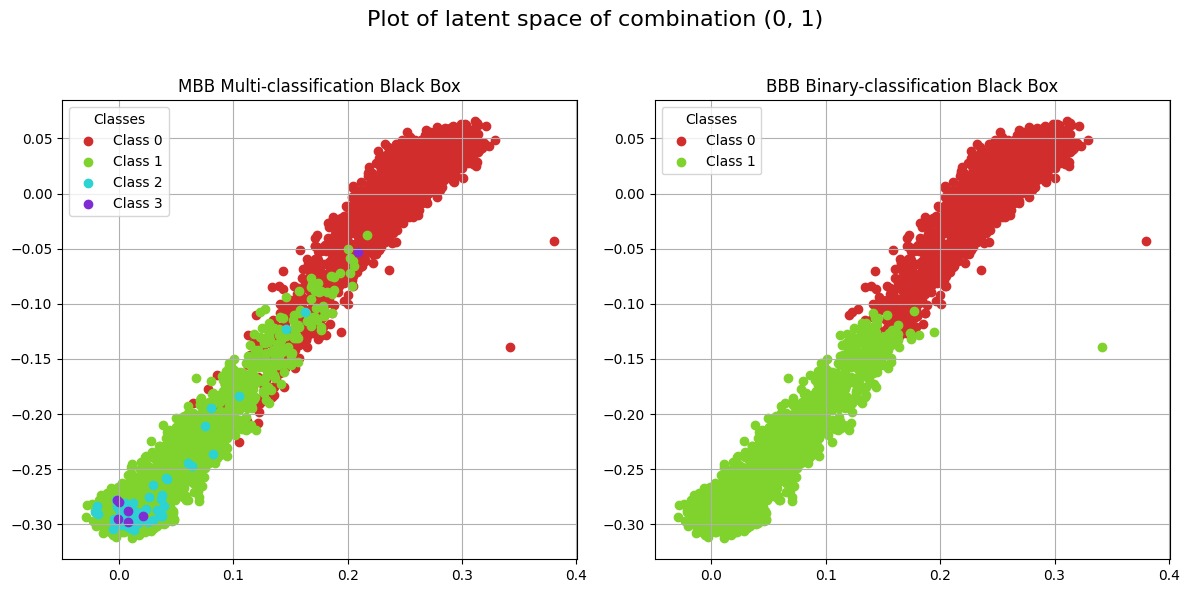

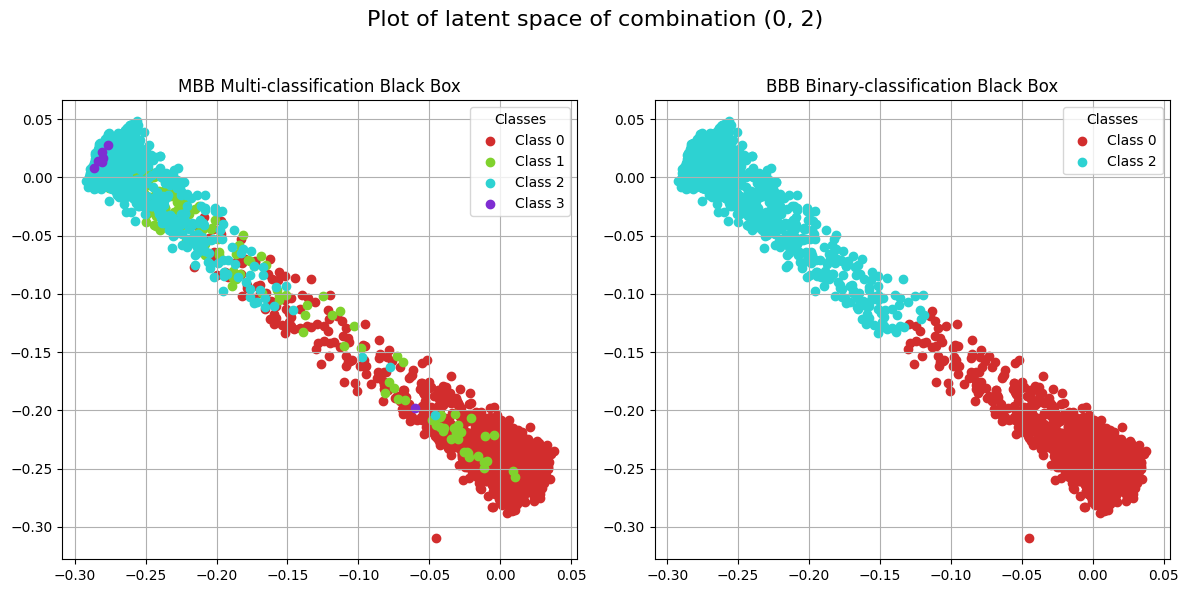

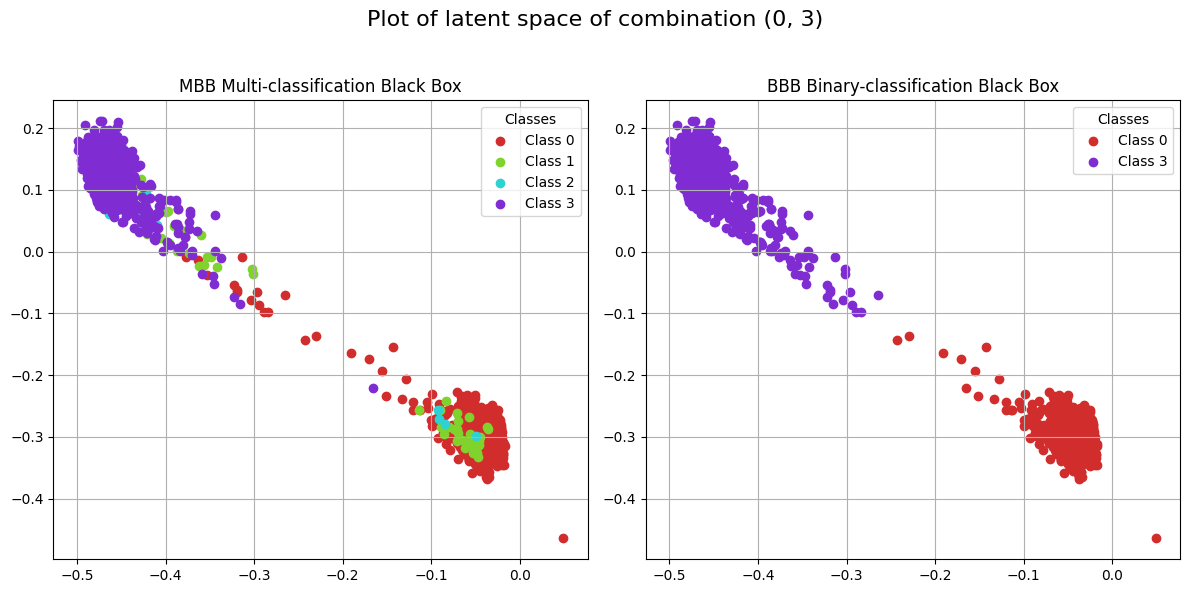

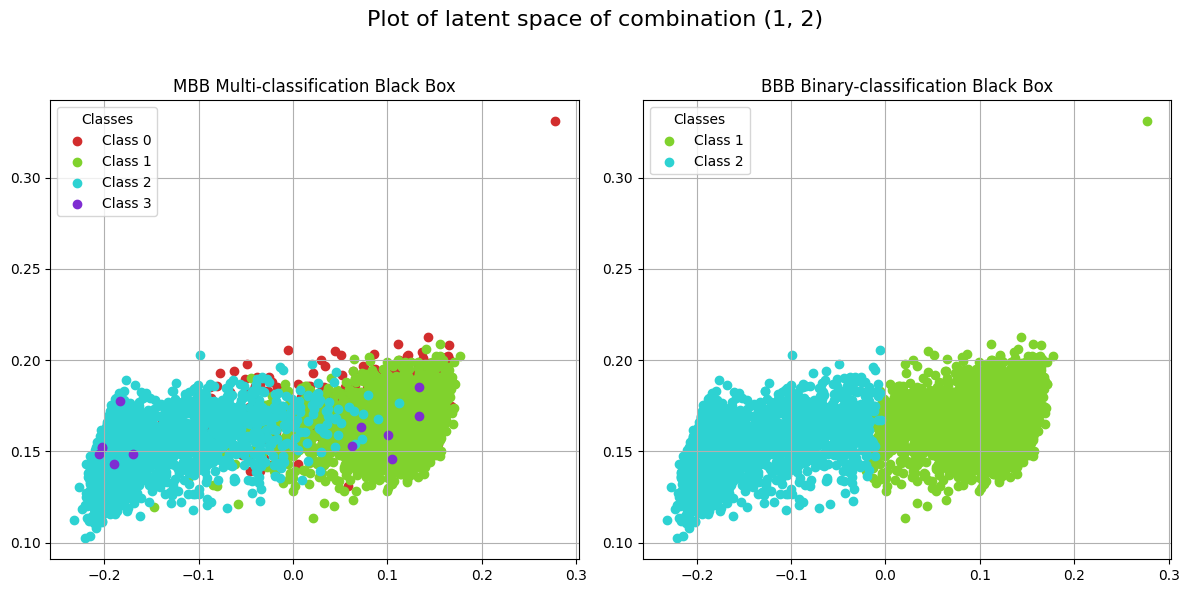

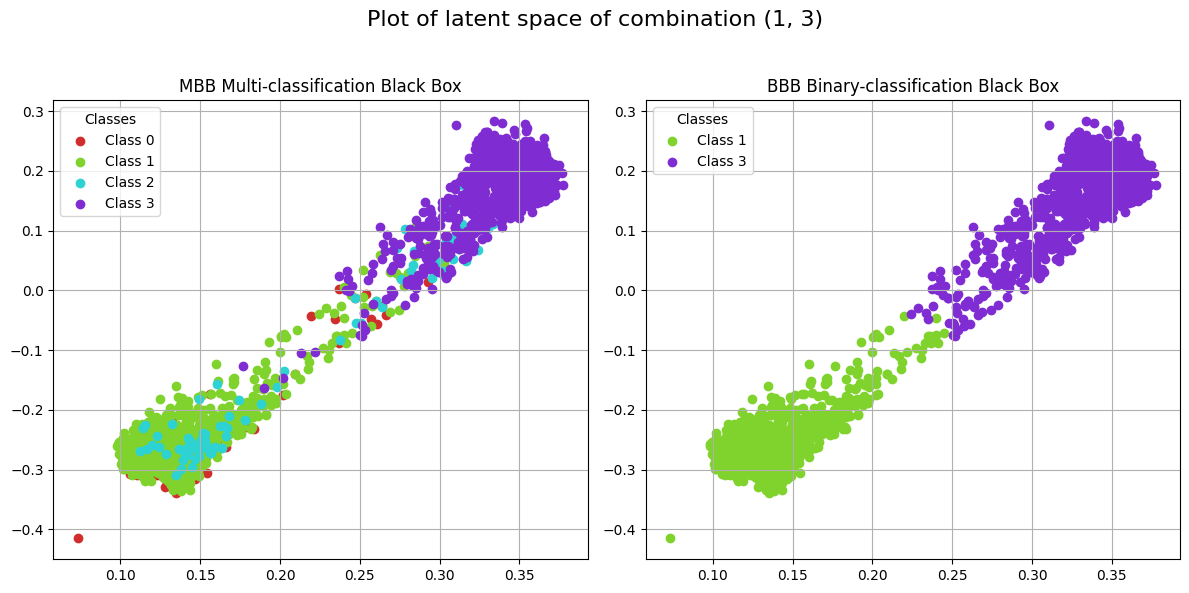

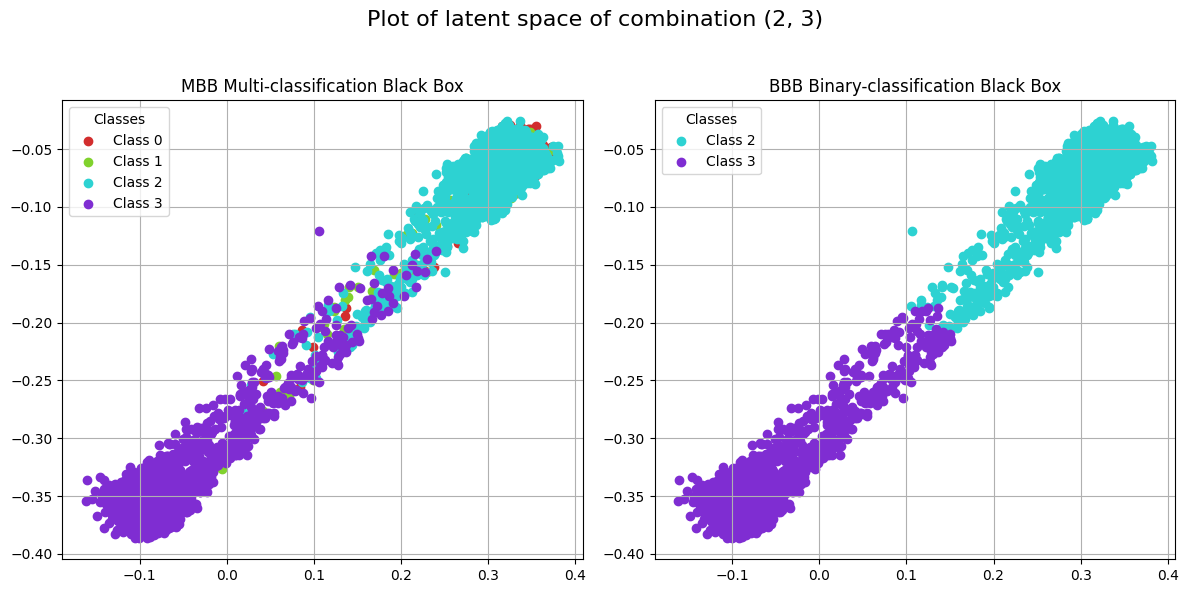

In [12]:
#ens_latent_spaces.plot_ls_comb(target="classes_MBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB",comb=(0,1))
#ens_latent_spaces.plot_ls_comb(target="classes_MBB",class_name=3)

ens_latent_spaces.plot_ls_comb_compare()

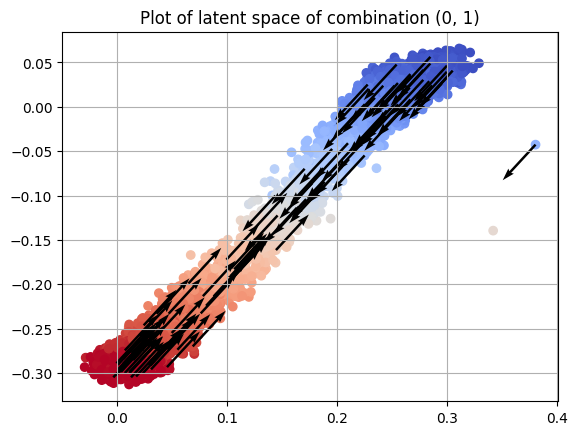

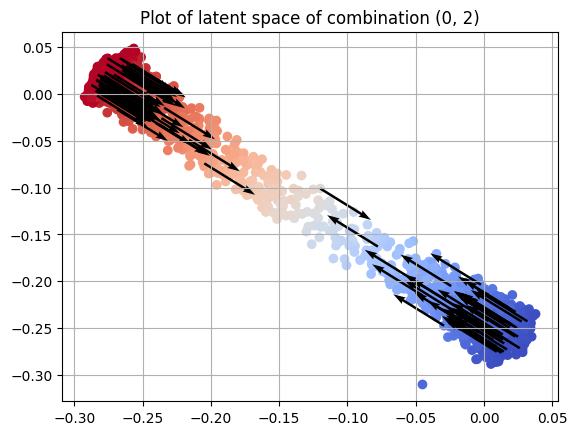

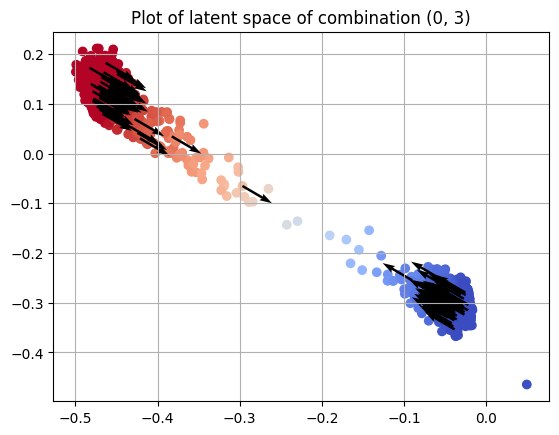

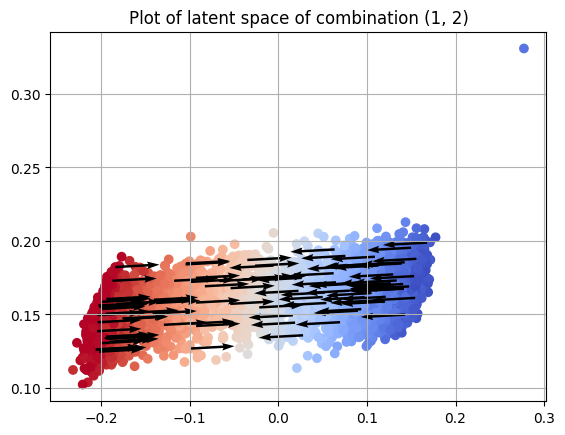

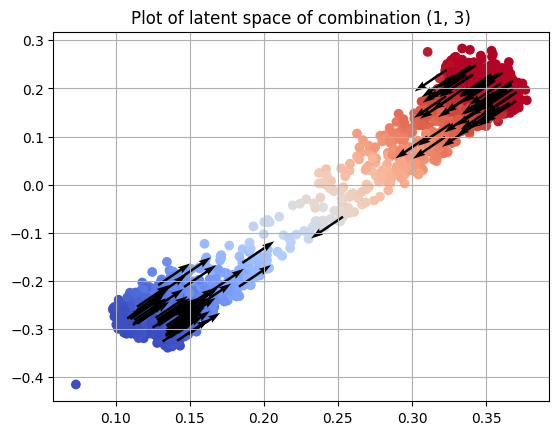

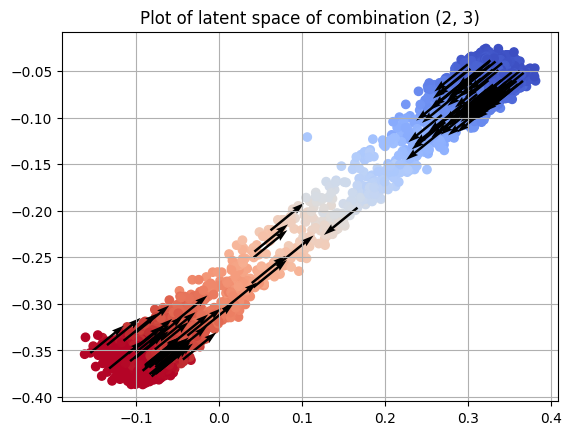

In [13]:
ens_latent_spaces.plot_ls_comb(target="directions")

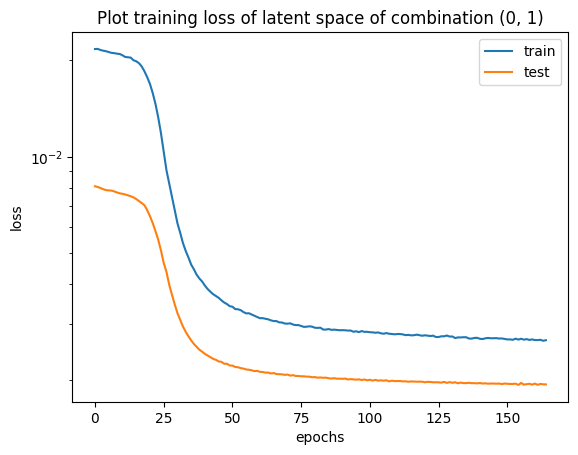

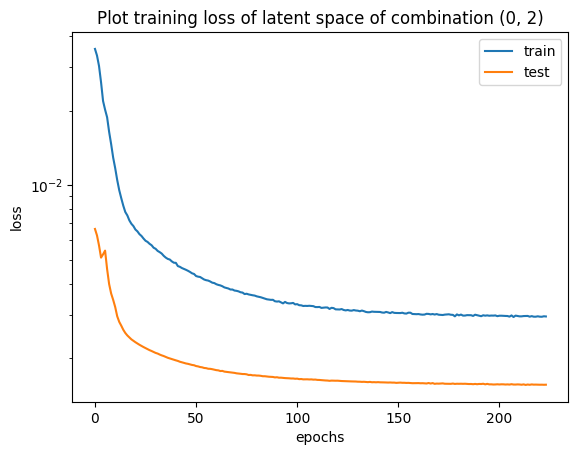

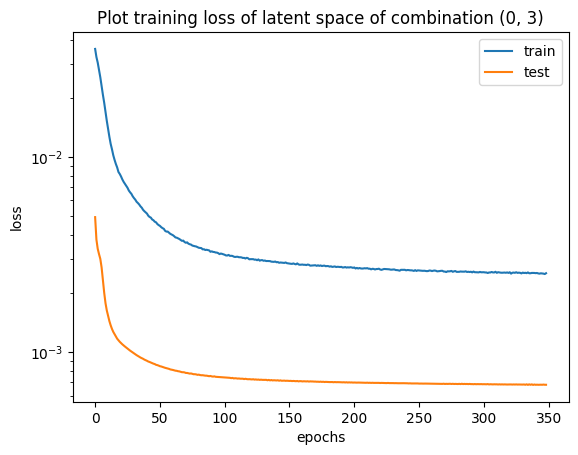

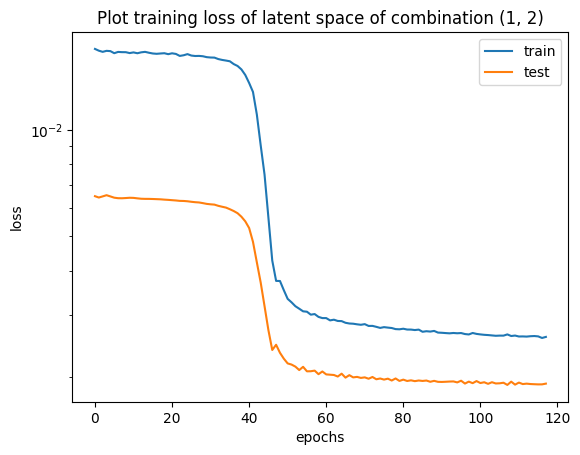

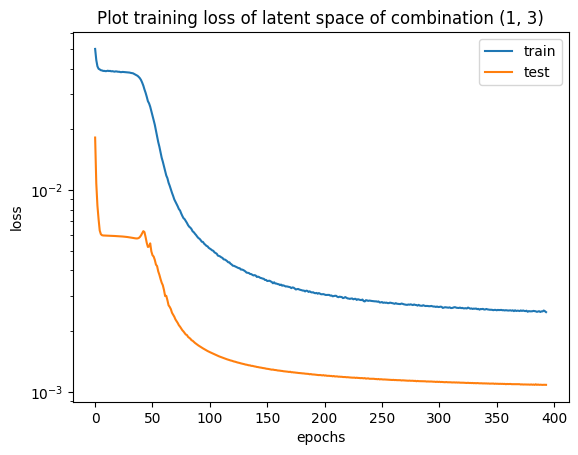

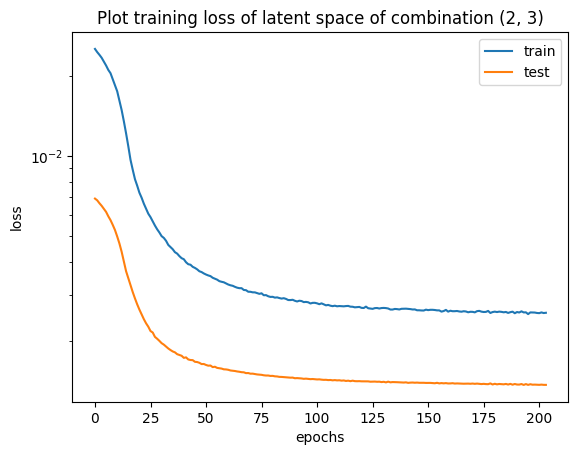

In [14]:
ens_latent_spaces.plot_ls_training_losses()

## Step 3: Inference: submit new samples and generate counterfactuals

In [15]:
index=1

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")

#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,test_instance.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 

Original class: [2]
Predicted class: [2]


In [16]:
ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=[1,3],filtering_mode="specific")

Modality: 1v1
Starting generation of counterfactuals using filtering_mode: specific 
'specific' considers only counterfactuals belonging to a specific class, different from the predicted outcome of the Multi-classification black-box model

The predicted class from MBB is [2]

Generation of counterfactual class 1


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]


BBB Encoded y_pred: [0 0 0 0 0]
BBB Decoded y_pred: [1 1 1 1 1]
MBB Original y_pred: [1 1 1 0 2]
Plausible counterfactuals: 4
Discarded counterfactuals: 1

Generation of counterfactual class 3


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.51it/s]

BBB Encoded y_pred: [1 1 1 1 1]
BBB Decoded y_pred: [3 3 3 3 3]
MBB Original y_pred: [2 2 3 3 2]
Plausible counterfactuals: 2


In [17]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
1  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
1     159.0       30.0                     13.4            19.0          151.0

In [18]:
ris[1]["counterfactuals"]

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7        27.8      118.0   
2  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
0     159.0        0.0                    213.0            19.0          151.0  
1     159.0       30.0                    213.0            19.0          151.0  
2      43.9       30.0                    213.0            19.0          151.0

## Step 4: Ranking: return the subset of counterfactuals relevant to a metric (accuracy/proximity)

### Show the counterfactuals per class=1 using proximity criterion

In [19]:
counterfactuals=pd.concat([ris[1]["counterfactuals"],ris[3]["counterfactuals"]]).reset_index(drop=True)
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=True, top_k=-1)

#print(f"Probabilities: {results[1]['prob']}")
#print(f"Distances: {results[1]['dist']}")

app=results[1]["counterfactuals"].copy()

app["class"]=1
app["dist"]=results[1]['dist']
app["prob"]=results[1]['prob']

app

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7        27.8      118.0   
2  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     159.0        0.0                    213.0            19.0   
1     159.0       30.0                    213.0            19.0   
2      43.9       30.0                    213.0            19.0   

   broad jump_cm  class        dist      prob  
0          151.0      1  168.201599  0.706606  
1          151.0      1  168.591304  0.407182  
2          151.0      1  192.007252  0.473362

### Other ranking -- all classes together

In [20]:
counterfactuals=pd.concat([ris[1]["counterfactuals"],ris[3]["counterfactuals"]]).reset_index(drop=True)

results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=4)
print(f"Probabilities: {results['prob']}")
print(f"Distances: {results['dist']}")
print(f"Classes: {results['class']}")
app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']


app

Probabilities: [0.9559089  0.9982153  0.70660615 0.4071817 ]
Distances: [ 15.83333333  32.         168.20159862 168.59130398]
Classes: [3 3 1 1]


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
2  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
3  54.0       1.0       0.0      160.3       52.7        27.8      118.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     159.0       30.0                     13.4             0.0   
1     159.0       30.0                    -25.0            19.0   
2     159.0        0.0                    213.0            19.0   
3     159.0       30.0                    213.0            19.0   

   broad jump_cm  class        dist      prob  
0          151.0      3   15.833333  0.955909  
1          151.0      3   32.000000  0.998215  
2          151.0      1  168.201599  0.706606  
3          151.0      1  168.591304  0.407182

## Other tests: instance 3050 original class 0

In [22]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,test_instance.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 

In [23]:
index=3050

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")


Original class: [0]
Predicted class: [0]


In [24]:
ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=[1,2,3],filtering_mode="specific")

Modality: 1v1
Starting generation of counterfactuals using filtering_mode: specific 
'specific' considers only counterfactuals belonging to a specific class, different from the predicted outcome of the Multi-classification black-box model

The predicted class from MBB is [0]

Generation of counterfactual class 1


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


BBB Encoded y_pred: [1 1 1 1]
BBB Decoded y_pred: [1 1 1 1]
MBB Original y_pred: [1 2 2 2]
Plausible counterfactuals: 4
Discarded counterfactuals: 3

Generation of counterfactual class 2


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


BBB Encoded y_pred: [1 1 1 1 1 1 1 1 1 1]
BBB Decoded y_pred: [2 2 2 2 2 2 2 2 2 2]
MBB Original y_pred: [0 3 1 2 3 3 3 3 3 3]
Plausible counterfactuals: 9
Discarded counterfactuals: 8

Generation of counterfactual class 3


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]

BBB Encoded y_pred: [1 1 1 1]
BBB Decoded y_pred: [3 3 3 3]
MBB Original y_pred: [3 3 3 2]
Plausible counterfactuals: 4
Discarded counterfactuals: 1



In [25]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3050  61.0       0.0       1.0      172.6       73.0        20.4       72.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3050     114.0       40.9                     15.0            37.0   

      broad jump_cm  
3050          188.0

In [27]:
counterfactuals=pd.concat([ris[1]["counterfactuals"],ris[2]["counterfactuals"],ris[3]["counterfactuals"]]).reset_index(drop=True)
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="accuracy", group_by_class=False, top_k=-1)

# print(f"Probabilities: {results['prob']}")
# print(f"Distances: {results['dist']}")
# print(f"Classes: {results['class']}")
app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']

app

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  61.0       0.0       1.0      172.6       73.0        20.4       72.0   
1  61.0       0.0       1.0      172.6       73.0        20.4       72.0   
2  61.0       0.0       1.0      172.6       73.0        54.9       72.0   
3  61.0       0.0       1.0      172.6       73.0        20.4       72.0   
4  61.0       0.0       1.0      172.6       73.0        20.4       72.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     114.0       40.9                    -25.0            37.0   
1     114.0       40.9                     15.0             0.0   
2     114.0        0.0                     15.0            37.0   
3     114.0       40.9                     15.0             7.0   
4     114.0       40.9                    213.0            37.0   

   broad jump_cm  class        dist      prob  
0          188.0      3   33.333333  0.934322  
1          188.0      3   30.833333  0.915930  
2          188.0      3   44.589641  0.631982  
3          303.0      2   99.040536  0.598788  
4          188.0      1  165.000000  0.436933

## Other tests: instance 1225 original class 1

In [11]:
index=1225

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")

Original class: [1]
Predicted class: [1]


In [29]:
ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="plausible")

Modality: 1v1
Starting generation of counterfactuals using filtering_mode: plausible 
'plausible' considers any counterfactuals belonging to classes different from the predicted outcome of the Multi-classification black-box model

The predicted class from MBB is [1]

Generation of counterfactual class 0


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.39s/it]


BBB Encoded y_pred: [0 0]
BBB Decoded y_pred: [0 0]
MBB Original y_pred: [0 0]
Plausible counterfactuals: 2
Generation of counterfactual class 2


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


BBB Encoded y_pred: [1 1 1 1 1 1 1 1 1 1]
BBB Decoded y_pred: [2 2 2 2 2 2 2 2 2 2]
MBB Original y_pred: [3 3 2 3 2 0 2 2 3 3]
Plausible counterfactuals: 10
Generation of counterfactual class 3


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]

BBB Encoded y_pred: [1 1 1]
BBB Decoded y_pred: [3 3 3]
MBB Original y_pred: [3 3 2]
Plausible counterfactuals: 3


In [31]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
1225  22.0       0.0       1.0      167.6       63.5         9.8       62.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
1225     134.0       43.9                     13.5            55.0   

      broad jump_cm  
1225          231.0

In [32]:
counterfactuals=pd.concat([ris[0]["counterfactuals"],ris[2]["counterfactuals"],ris[3]["counterfactuals"]]).reset_index(drop=True)
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)

# print(f"Probabilities: {results['prob']}")
# print(f"Distances: {results['dist']}")
# print(f"Classes: {results['class']}")
app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']

app

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
1   22.0       0.0       1.0      167.6       63.5         9.8       37.0   
2   22.0       0.0       1.0      167.6       63.5        44.5       62.0   
3   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
4   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
5   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
6   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
7   22.0       0.0       1.0      167.6       63.5         9.8       37.0   
8   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
9   22.0       0.0       1.0      167.6       63.5         9.8       62.0   
10  22.0       0.0       1.0      167.6       63.5         9.8       37.0   
11  22.0       0.0       1.0      167.6       63.5        44.5       62.0   
12  22.0       0.0       1.0      167.6       63.5         9.8       62.0   
13  22.0       0.0       1.0      167.6       63.5         9.8      120.0   
14  22.0       0.0       1.0      167.6       63.5         9.8       62.0   

    systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0      134.0       67.6                      2.3            55.0   
1      134.0       43.9                      2.3            55.0   
2      134.0       43.9                      2.3            55.0   
3      134.0       43.9                    -25.0            55.0   
4      134.0       43.9                     13.5             7.0   
5      134.0       43.9                     13.5             0.0   
6      195.0       43.9                      2.3            55.0   
7      134.0       43.9                    213.0            55.0   
8      134.0        0.0                    213.0            55.0   
9      134.0       67.6                     13.5            55.0   
10     134.0       43.9                     13.5            55.0   
11     134.0       43.9                     13.5            55.0   
12     195.0       43.9                     13.5            55.0   
13     134.0        0.0                     13.5            55.0   
14     134.0       43.9                    213.0            55.0   

    broad jump_cm  class        dist      prob  
0           231.0      3   21.844304  0.996613  
1           231.0      3   22.828467  0.997116  
2           231.0      3   30.385601  0.999094  
3           231.0      3   32.083333  0.998142  
4           231.0      3   40.000000  0.999851  
5           231.0      3   45.833333  0.999899  
6           231.0      3   51.683062  0.998093  
7           231.0      0  167.550262  0.918680  
8           231.0      0  170.227503  0.824068  
9             0.0      2  193.510497  0.946774  
10            0.0      2  193.624063  0.858292  
11            0.0      2  194.659764  0.445769  
12            0.0      2  199.098663  0.661165  
13            0.0      2  201.818486  0.944637  
14            0.0      0  254.352732  0.662582

## Execute testing on 1000 random test samples (stratify)

In [23]:
test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0     43.0     False      True      175.0       88.0        23.6       88.0   
1     54.0      True     False      160.3       52.7        27.8       85.0   
2     48.0     False      True      174.2       84.6        26.1       86.0   
3     46.0      True     False      155.1       62.5        37.7       65.0   
4     34.0     False      True      164.4       67.3        19.4       83.0   
...    ...       ...       ...        ...        ...         ...        ...   
4012  63.0      True     False      153.9       51.0        26.0       80.0   
4013  38.0     False      True      170.4       69.5        23.1       84.0   
4014  61.0     False      True      167.4       80.8        29.1       58.0   
4015  28.0     False      True      177.1       70.3        17.2       83.0   
4016  32.0      True     False      171.0       67.8        28.3       79.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0        125.0       51.0                     16.1            35.0   
1        159.0       30.0                     13.4            19.0   
2        121.0       38.5                      3.0            26.0   
3        113.0       24.7                     21.0            24.0   
4        134.0       44.7                     10.6            41.0   
...        ...        ...                      ...             ...   
4012     159.0       24.3                     15.6            24.0   
4013     139.0       42.7                     14.5            43.0   
4014     137.0       43.8                     16.8            28.0   
4015     123.0       43.5                     14.2            66.0   
4016     107.0       33.4                     23.4            44.0   

      broad jump_cm  class  
0             204.0      2  
1             151.0      2  
2             190.0      3  
3             124.0      3  
4             216.0      1  
...             ...    ...  
4012          137.0      2  
4013          208.0      1  
4014          179.0      1  
4015          236.0      1  
4016          152.0      1  

[4017 rows x 13 columns]

In [24]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test_set.iloc[:,:-1], test_set.iloc[:,-1], test_size=1000, stratify=test_set.iloc[:,-1], random_state=42)

In [25]:
sampled_test_set=pd.concat([X_test_2,y_test_2],axis=1)
sampled_test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3639  51.0     False      True      172.8       65.7        20.4       83.0   
2362  52.0      True     False      159.3       54.4        24.0       74.0   
2071  44.0     False      True      168.2       71.6        17.7       86.0   
1716  23.0      True     False      165.6       64.8        25.0       79.0   
2784  45.0     False      True      166.9       68.2        24.4       77.0   
...    ...       ...       ...        ...        ...         ...        ...   
19    28.0     False      True      176.4       86.0         9.3       83.0   
101   37.0     False      True      167.7       77.3        27.8      102.0   
831   37.0      True     False      178.2       74.9        23.8       77.0   
976   22.0      True     False      168.6       71.0        33.9       77.0   
2384  27.0      True     False      158.8       47.7        26.7       80.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3639     111.0       35.1                      3.7            20.0   
2362     126.0       27.1                     22.8            22.0   
2071     144.0       49.1                     15.4            51.0   
1716     127.0       30.6                     19.6            39.0   
2784     141.0       47.6                     16.0            50.0   
...        ...        ...                      ...             ...   
19       140.0       46.6                     23.4            62.0   
101      146.0       49.1                     15.6            57.0   
831      128.0       44.7                     22.3            46.0   
976      128.0       27.0                     30.6            30.0   
2384     127.0       20.3                     14.0            21.0   

      broad jump_cm  class  
3639          194.0      3  
2362          156.0      1  
2071          214.0      0  
1716          205.0      1  
2784          198.0      0  
...             ...    ...  
19            239.0      0  
101           226.0      0  
831           191.0      3  
976           212.0      1  
2384          144.0      3  

[1000 rows x 13 columns]

In [26]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,sampled_test_set.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 
ris=ens_latent_spaces.execute_testing_on_data("t0",sampled_test_set,change_f,max_f,filtering_mode="plausible",debug=False)

Processing test instances:   0%|          | 0/1000 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.71s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.45s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.92s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.20s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]

100%|██████████████████

# Mode 1vAll

In [12]:
train_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Train.csv")
test_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Test.csv")

X_train=train_set.iloc[:,:-1].astype(np.float64)
X_test=test_set.iloc[:,:-1].astype(np.float64)
y_train=train_set.iloc[:,-1]
y_test=test_set.iloc[:,-1]

In [22]:
ens_latent_spaces=MultiClass_CP_ILS(bbox,train_set,test_set,bbox_chosen,"class",mode="1vAll")

Target class: class
Class values are: [0 1 2 3]
Numerical indexes: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Categorical indexes: [1, 2]
[[0], [1, 2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

Modality:  1vAll
Preparation of datasets for combination (0, 'All')
Preparation of datasets for combination (1, 'All')
Preparation of datasets for combination (2, 'All')
Preparation of datasets for combination (3, 'All')


In [23]:
ens_latent_spaces.load_latent_spaces(LS_PATH+"Body_Perf_XGB_generated_lantent_spaces1VAll.pkl")

Latent space loaded from generated_lantent_spaces1VAll.pkl


In [39]:
ens_latent_spaces.generate_ls(latent_dim_k=2,early_stop_param=10,timer=True)
#ens_latent_spaces.save_latent_spaces("generated_lantent_spaces1VAll.pkl")

Training latent space for combination: (0, 'All')


Epoch: 308 Train Loss 0.00242 Test Loss 0.00131 Early Stopping 10


Training latent space for combination: (1, 'All')


Epoch: 232 Train Loss 0.00204 Test Loss 0.00178 Early Stopping 10


Training latent space for combination: (2, 'All')


Epoch: 247 Train Loss 0.00216 Test Loss 0.00217 Early Stopping 10


Training latent space for combination: (3, 'All')


Epoch: 495 Train Loss 0.00251 Test Loss 0.00140 Early Stopping 10

Time needed to train all the latent spaces 354.22 sec


In [40]:
#ens_latent_spaces.save_latent_spaces("generated_lantent_spaces1VAll.pkl")

Latent space saved in generated_lantent_spaces1VAll.pkl


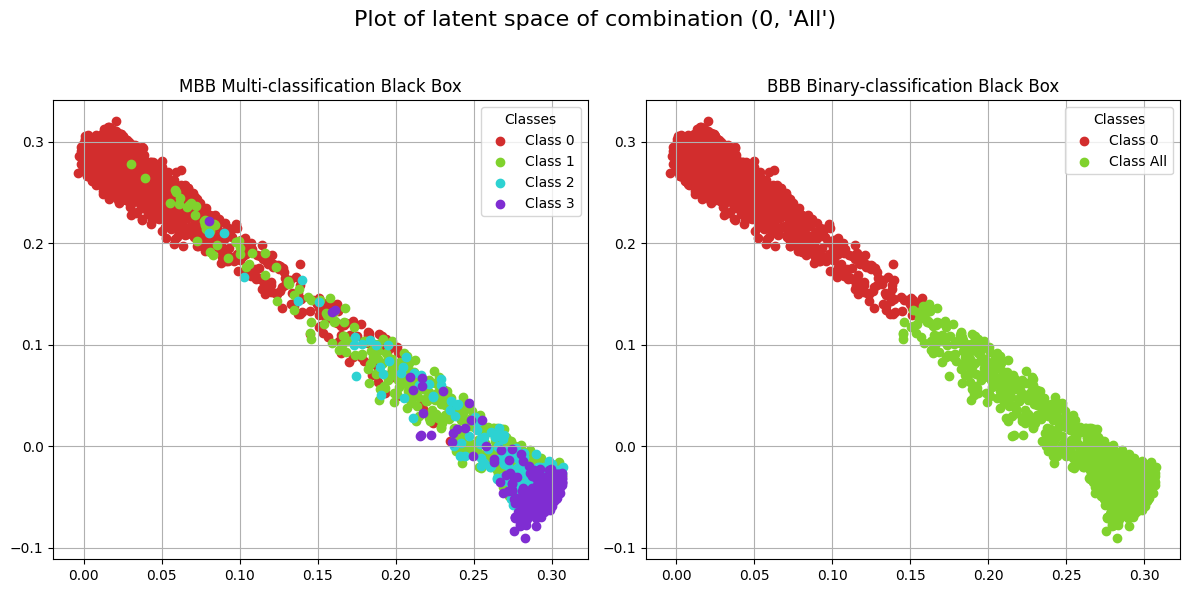

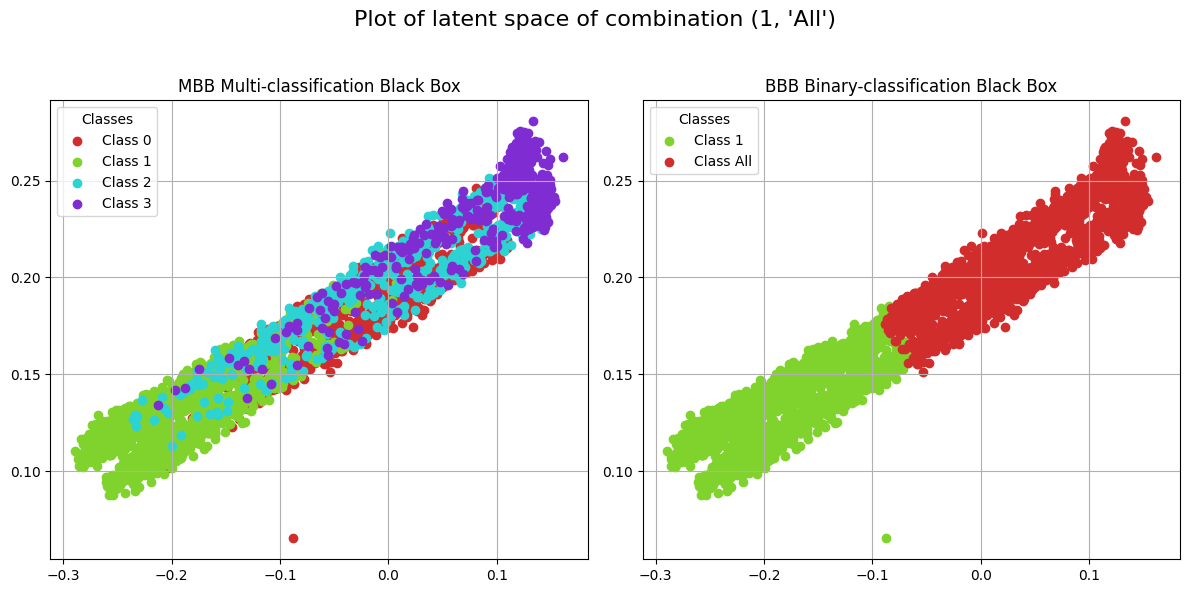

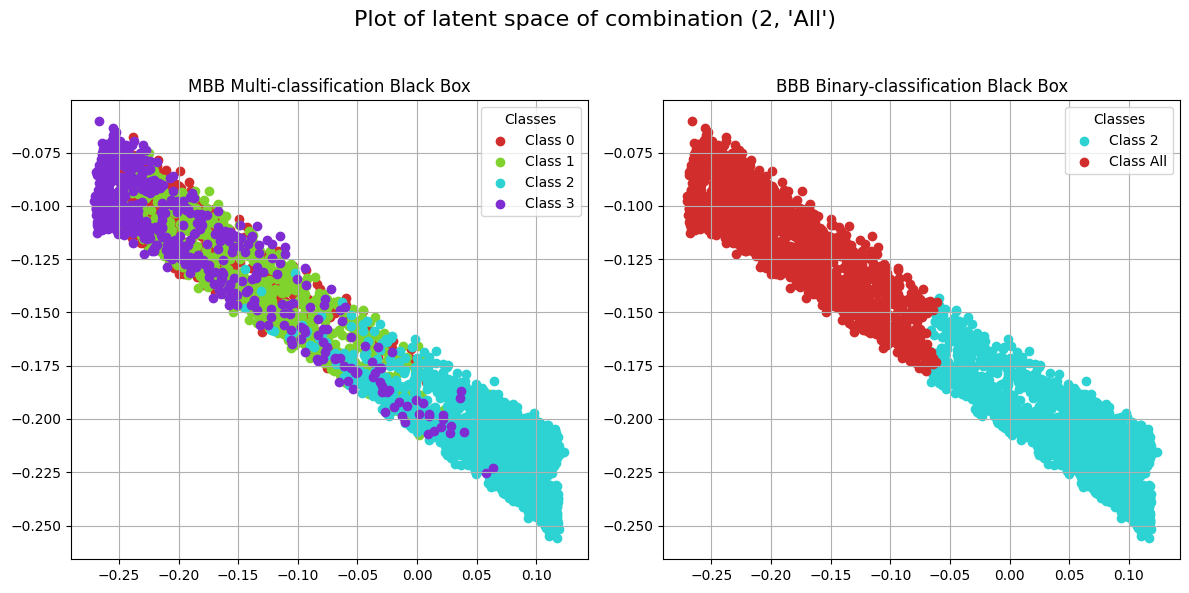

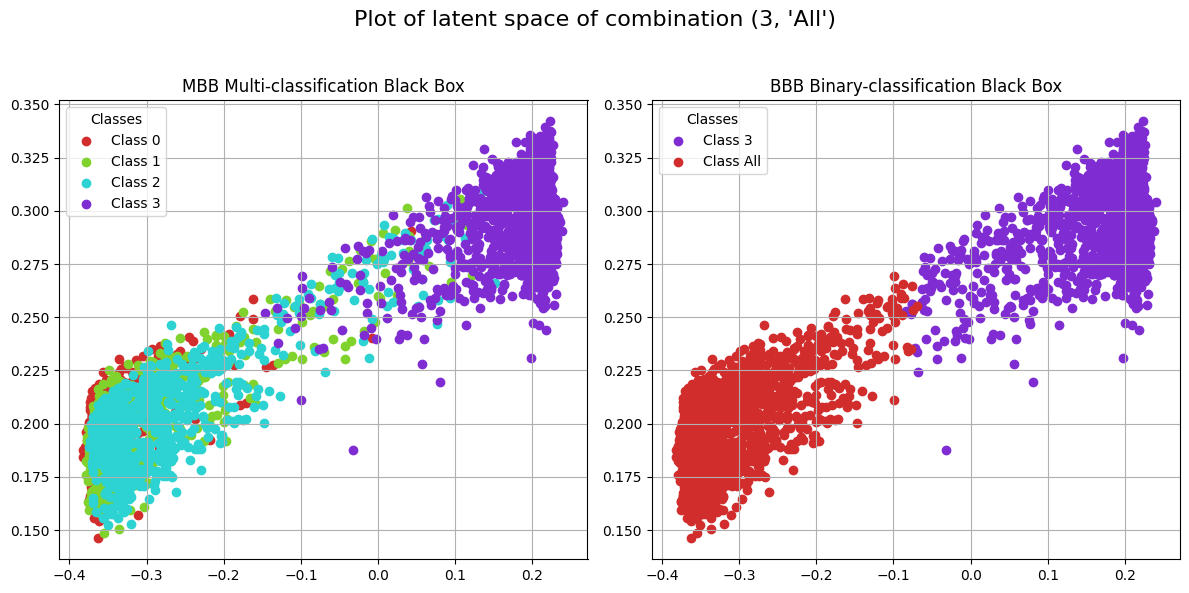

In [41]:
#ens_latent_spaces.plot_ls_comb(target="classes_MBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB",comb=(1,'All'))
#ens_latent_spaces.plot_ls_comb(target="classes_MBB",class_name=3)

ens_latent_spaces.plot_ls_comb_compare()

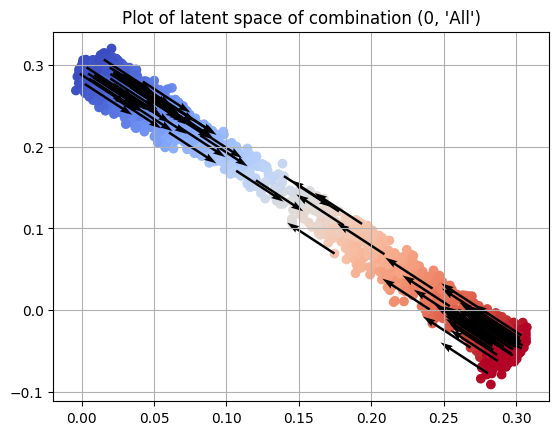

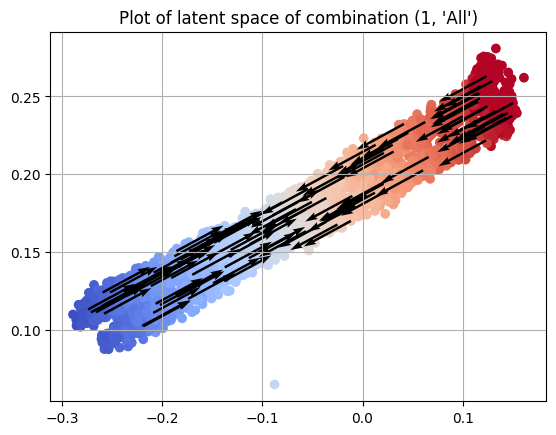

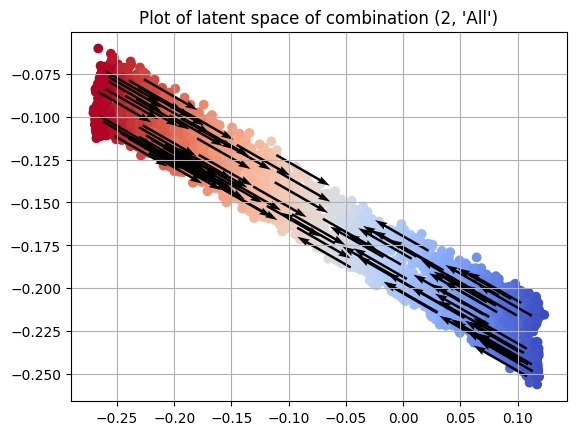

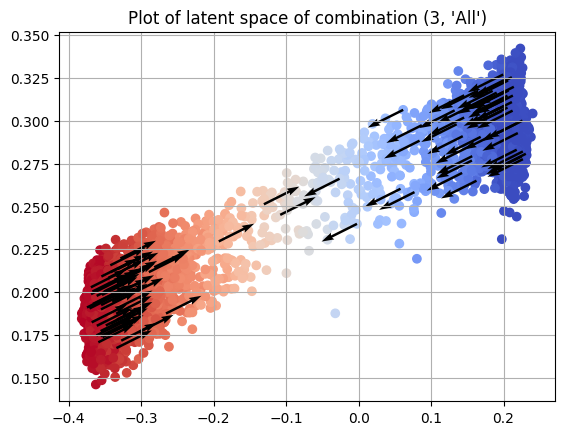

In [42]:
ens_latent_spaces.plot_ls_comb(target="directions")

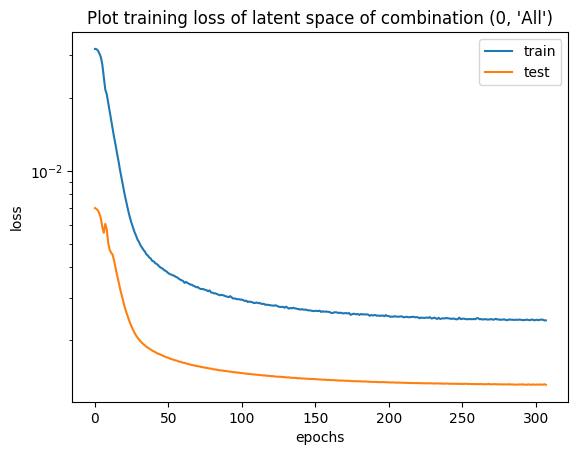

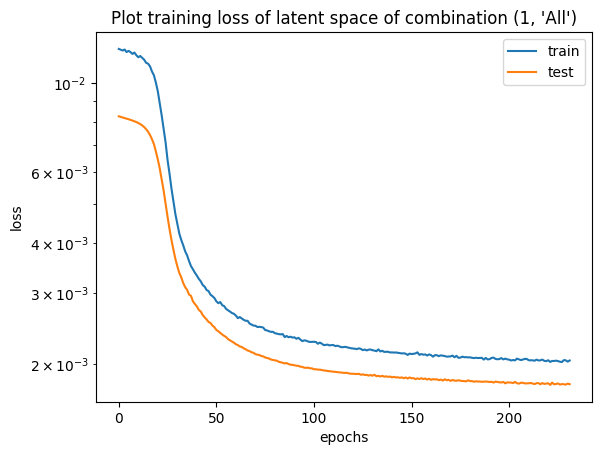

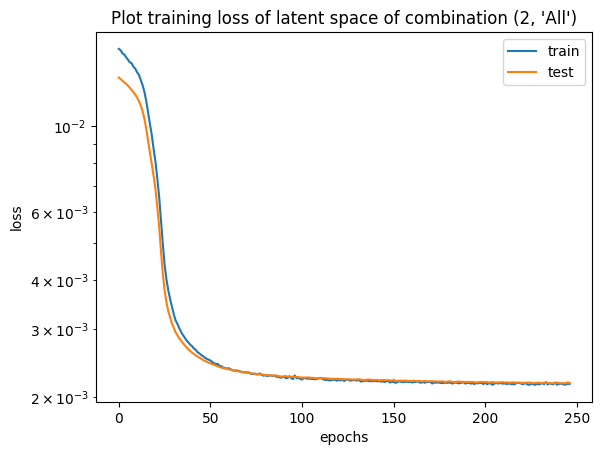

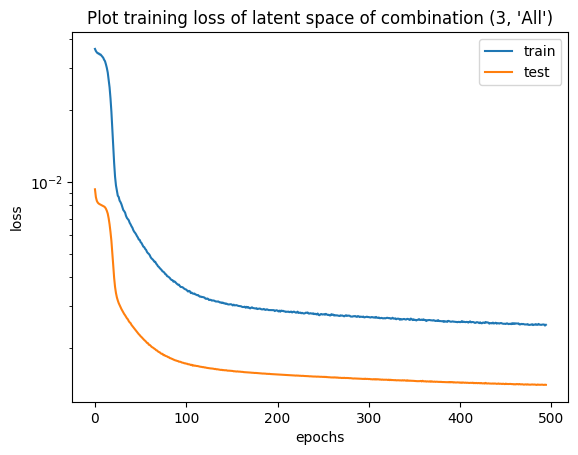

In [43]:
ens_latent_spaces.plot_ls_training_losses()

In [41]:
index=790

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")

#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,test_instance.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 

ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="")

Original class: [2]
Predicted class: [1]
Modality: 1vAll
Starting generation of counterfactuals 

The predicted class from MBB is [1]

Generation of counterfactual class ALL


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]

BBB Decoded y_pred: [0 0 0 0]
BBB 1 means binary correctly classified
MBB Original y_pred: []
Plausible counterfactuals: 0


In [45]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
1  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
1     159.0       30.0                     13.4            19.0          151.0

In [46]:
counterfactuals=ris["All"]["counterfactuals"]
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)
# print(f"Probabilities: {results['prob']}")
# print(f"Distances: {results['dist']}")

app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']
app

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7         3.0       85.0   
2  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
3  54.0       1.0       0.0      160.3       52.7        27.8        0.0   
4  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
5  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     159.0       30.0                     13.4             0.0   
1     159.0       30.0                    -20.0            19.0   
2     159.0        0.0                    -20.0            19.0   
3     159.0       30.0                    -20.0            19.0   
4     159.0       30.0                    -20.0            19.0   
5       0.0       30.0                    -20.0            19.0   

   broad jump_cm  class        dist      prob  
0          151.0      3   15.833333  0.955909  
1          151.0      3   34.667067  0.998409  
2          151.0      3   37.412490  0.998330  
3          151.0      3   76.105555  0.997132  
4            0.0      3  128.874832  0.998917  
5          151.0      3  135.391818  0.999004

In [47]:
index=3050

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")
ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="")

Original class: [0]
Predicted class: [0]
Modality: 1vAll
Starting generation of counterfactuals 

The predicted class from MBB is [0]

Generation of counterfactual class ALL


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]

BBB Decoded y_pred: [1 1 1]
BBB 1 means binary correctly classified
MBB Original y_pred: [3 3 2]
Plausible counterfactuals: 3


In [48]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3050  61.0       0.0       1.0      172.6       73.0        20.4       72.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3050     114.0       40.9                     15.0            37.0   

      broad jump_cm  
3050          188.0

In [49]:
counterfactuals=ris["All"]["counterfactuals"]
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)

print(f"Probabilities: {results['prob']}")
print(f"Distances: {results['dist']}")
print(f"Classes: {results['class']}")
app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']

app

Probabilities: [0.93432176 0.9159298  0.62824464]
Distances: [ 29.16666667  30.83333333 172.62877641]
Classes: [3 3 2]


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  61.0       0.0       1.0      172.6       73.0        20.4       72.0   
1  61.0       0.0       1.0      172.6       73.0        20.4       72.0   
2  61.0       0.0       1.0      172.6       73.0        20.4       72.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     114.0       40.9                    -20.0            37.0   
1     114.0       40.9                     15.0             0.0   
2     201.0       40.9                     15.0            37.0   

   broad jump_cm  class        dist      prob  
0          188.0      3   29.166667  0.934322  
1          188.0      3   30.833333  0.915930  
2            0.0      2  172.628776  0.628245

## Execute testing on 1000 random test samples (stratify)

In [12]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test_set.iloc[:,:-1], test_set.iloc[:,-1], test_size=1000, stratify=test_set.iloc[:,-1], random_state=42)
sampled_test_set=pd.concat([X_test_2,y_test_2],axis=1)
sampled_test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3639  51.0     False      True      172.8       65.7        20.4       83.0   
2362  52.0      True     False      159.3       54.4        24.0       74.0   
2071  44.0     False      True      168.2       71.6        17.7       86.0   
1716  23.0      True     False      165.6       64.8        25.0       79.0   
2784  45.0     False      True      166.9       68.2        24.4       77.0   
...    ...       ...       ...        ...        ...         ...        ...   
19    28.0     False      True      176.4       86.0         9.3       83.0   
101   37.0     False      True      167.7       77.3        27.8      102.0   
831   37.0      True     False      178.2       74.9        23.8       77.0   
976   22.0      True     False      168.6       71.0        33.9       77.0   
2384  27.0      True     False      158.8       47.7        26.7       80.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3639     111.0       35.1                      3.7            20.0   
2362     126.0       27.1                     22.8            22.0   
2071     144.0       49.1                     15.4            51.0   
1716     127.0       30.6                     19.6            39.0   
2784     141.0       47.6                     16.0            50.0   
...        ...        ...                      ...             ...   
19       140.0       46.6                     23.4            62.0   
101      146.0       49.1                     15.6            57.0   
831      128.0       44.7                     22.3            46.0   
976      128.0       27.0                     30.6            30.0   
2384     127.0       20.3                     14.0            21.0   

      broad jump_cm  class  
3639          194.0      3  
2362          156.0      1  
2071          214.0      0  
1716          205.0      1  
2784          198.0      0  
...             ...    ...  
19            239.0      0  
101           226.0      0  
831           191.0      3  
976           212.0      1  
2384          144.0      3  

[1000 rows x 13 columns]

In [13]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,sampled_test_set.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 
ris=ens_latent_spaces.execute_testing_on_data("t1vAll",sampled_test_set,change_f,max_f,filtering_mode="",debug=False)

Processing test instances:   0%|          | 0/1000 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.39s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.47s/it]

100%|██████████████████

# Mode 1vAll_Spec

In [8]:
train_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Train.csv")
test_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Test.csv")

X_train=train_set.iloc[:,:-1].astype(np.float64)
X_test=test_set.iloc[:,:-1].astype(np.float64)
y_train=train_set.iloc[:,-1]
y_test=test_set.iloc[:,-1]

In [9]:
ens_latent_spaces=MultiClass_CP_ILS(bbox,train_set,test_set,bbox_chosen,"class",mode="1vAll_Spec")

Target class: class
Class values are: [0 1 2 3]
Numerical indexes: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Categorical indexes: [1, 2]
[[0], [1, 2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

Modality:  1vAll_Spec
Preparation of datasets for combination (0, 'All_Spec')
Preparation of datasets for combination (1, 'All_Spec')
Preparation of datasets for combination (2, 'All_Spec')
Preparation of datasets for combination (3, 'All_Spec')


In [10]:
ens_latent_spaces.load_latent_spaces(LS_PATH+"Body_Perf_XGB_generated_lantent_spaces1VAll_Spec.pkl")

Latent space loaded from generated_lantent_spaces1VAll_Spec.pkl


In [11]:
#ens_latent_spaces.load_latent_spaces("generated_lantent_spaces1VAll.pkl")
ens_latent_spaces.generate_ls(latent_dim_k=2,early_stop_param=10,timer=True)
#ens_latent_spaces.save_latent_spaces("generated_lantent_spaces1VAll.pkl")

Training latent space for combination: (0, 'All_Spec')


Epoch: 529 Train Loss 0.00296 Test Loss 0.00182 Early Stopping 10


Training latent space for combination: (1, 'All_Spec')


Epoch: 1000 Train Loss 0.00225 Test Loss 0.00225 Early Stopping 0


Training latent space for combination: (2, 'All_Spec')


Epoch: 593 Train Loss 0.00236 Test Loss 0.00267 Early Stopping 10


Training latent space for combination: (3, 'All_Spec')


Epoch: 1000 Train Loss 0.00247 Test Loss 0.00139 Early Stopping 6

Time needed to train all the latent spaces 856.75 sec


In [12]:
ens_latent_spaces.save_latent_spaces("generated_lantent_spaces1VAll_Spec.pkl")

Latent space saved in generated_lantent_spaces1VAll_Spec.pkl


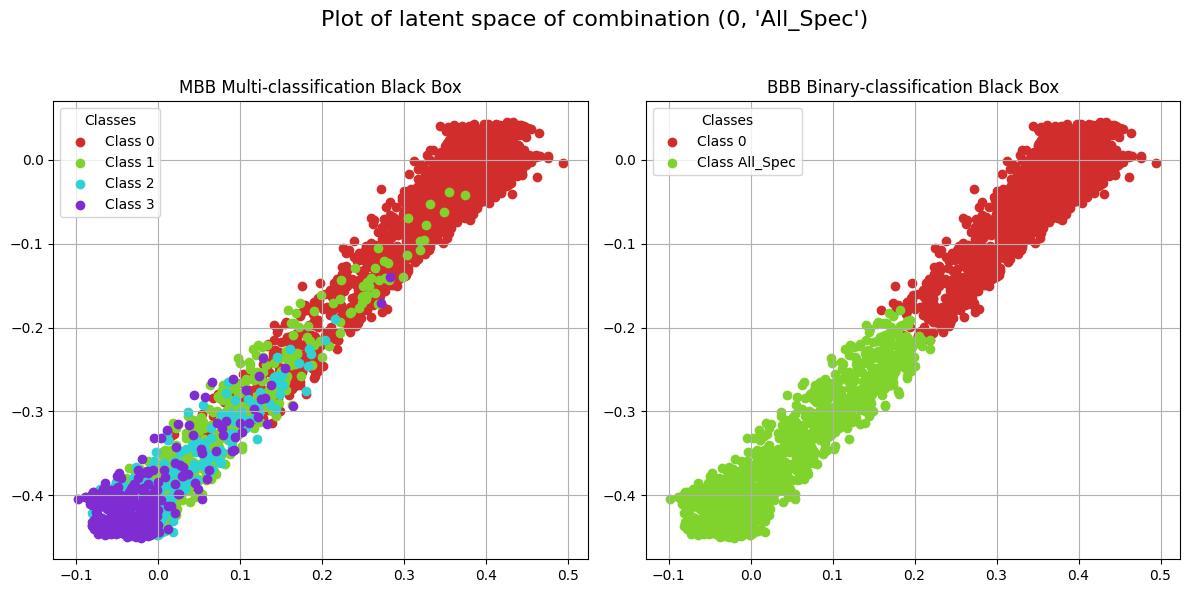

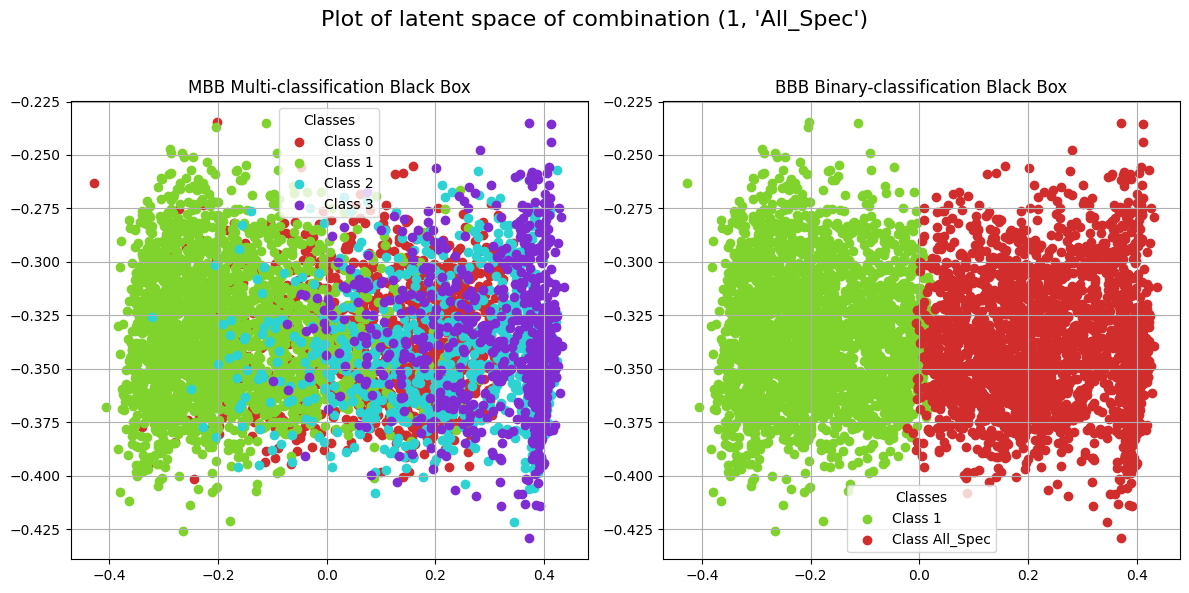

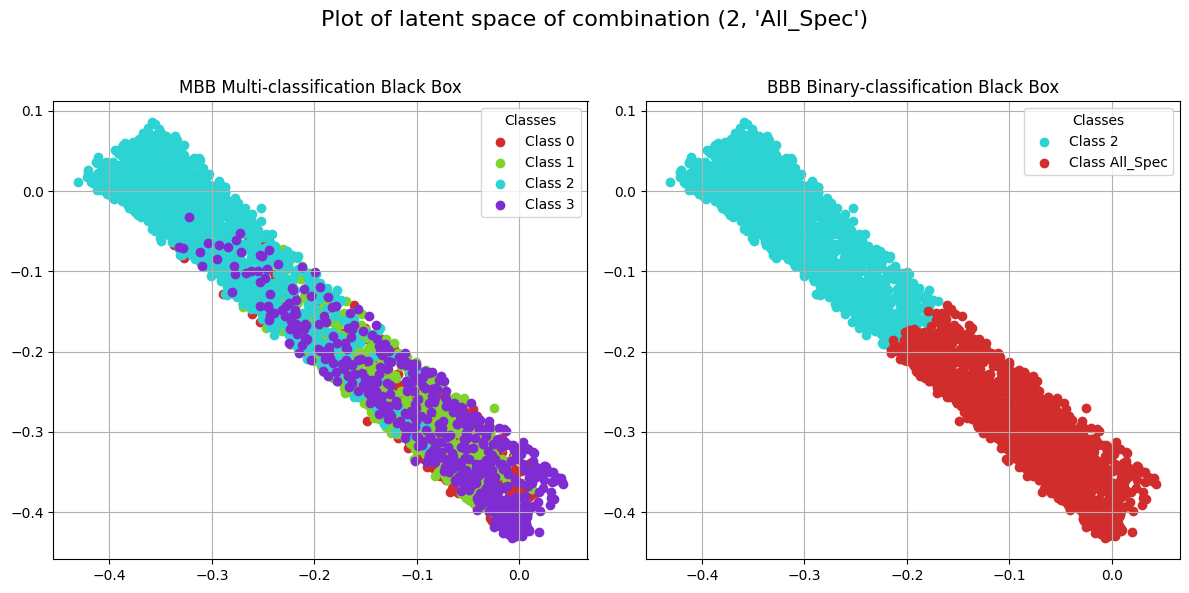

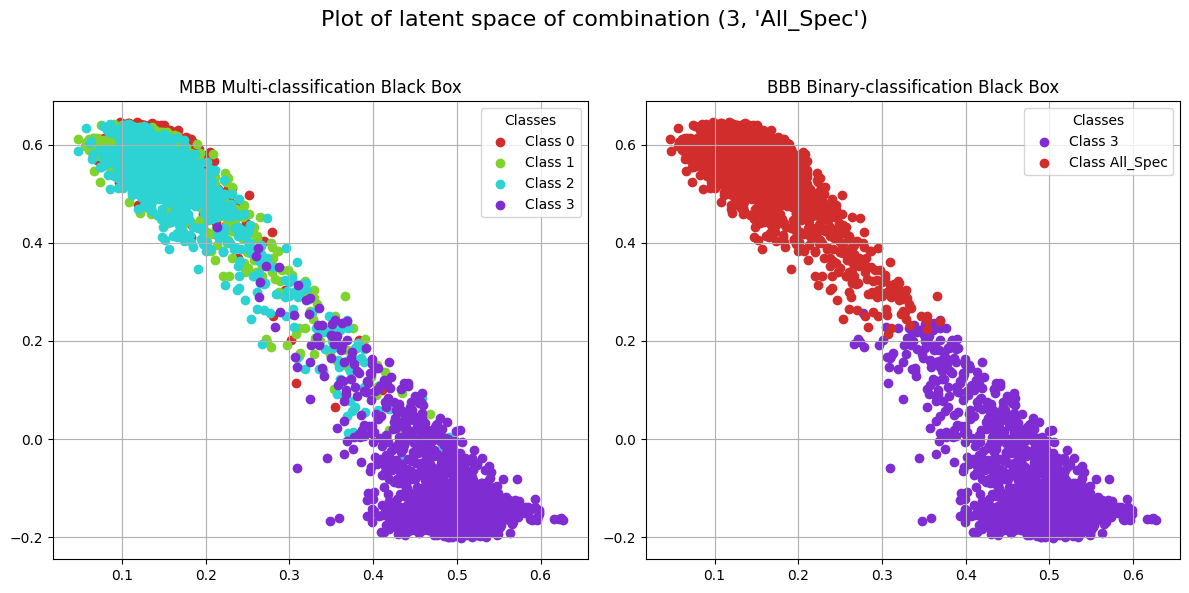

In [13]:
#ens_latent_spaces.plot_ls_comb(target="classes_MBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB")
#ens_latent_spaces.plot_ls_comb(target="classes_BBB",comb=(1,'All_Spec'))
#ens_latent_spaces.plot_ls_comb(target="classes_MBB",class_name=3)

ens_latent_spaces.plot_ls_comb_compare()

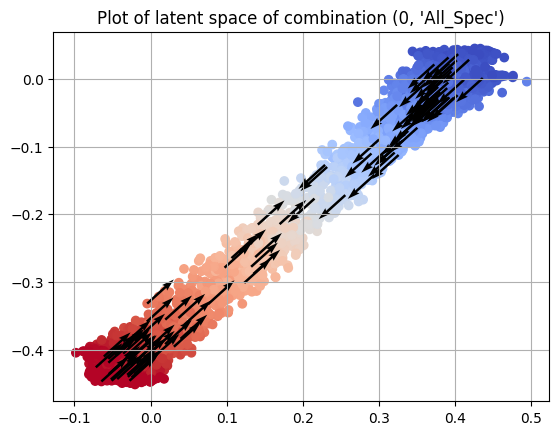

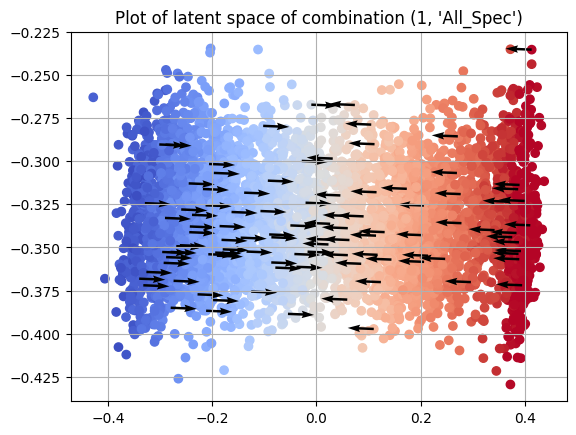

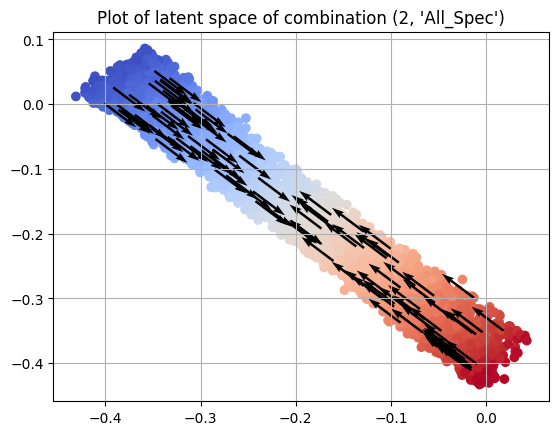

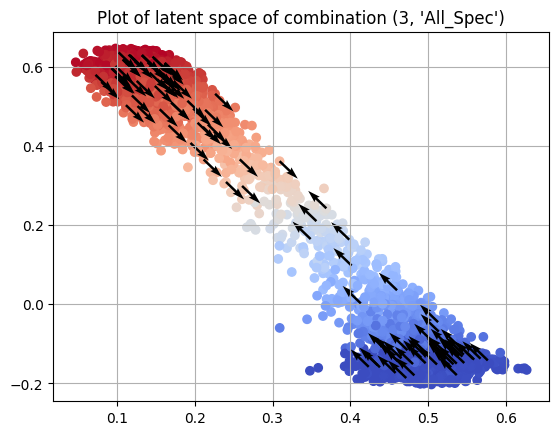

In [14]:
ens_latent_spaces.plot_ls_comb(target="directions")

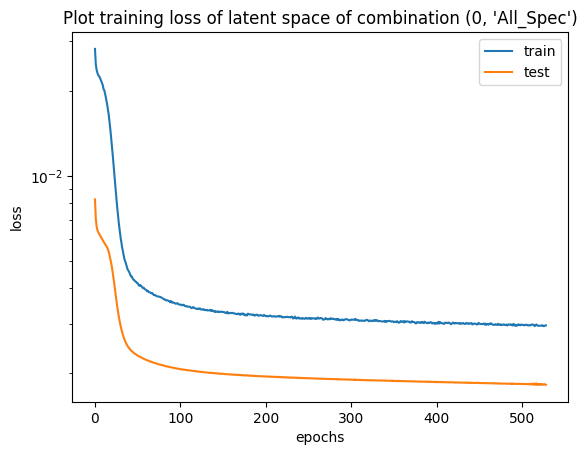

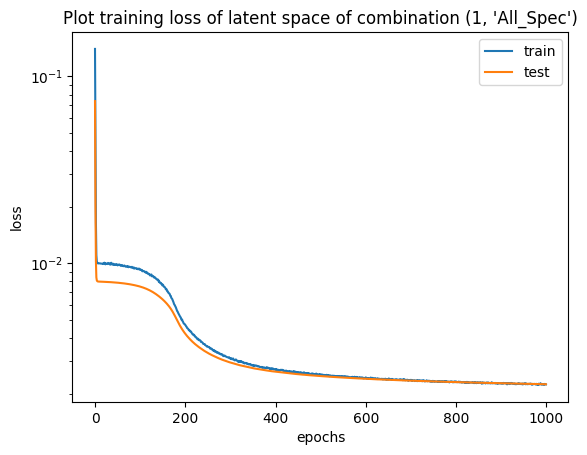

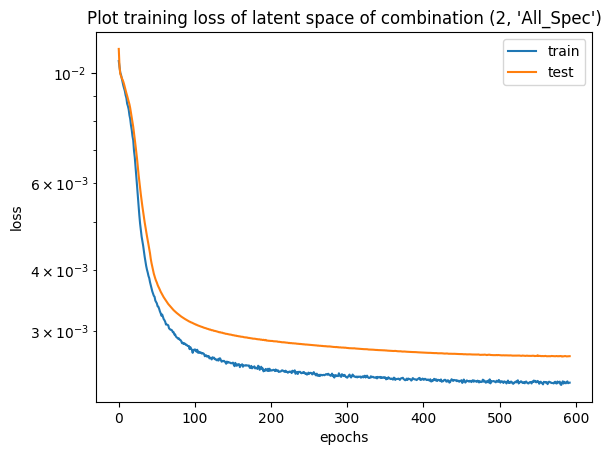

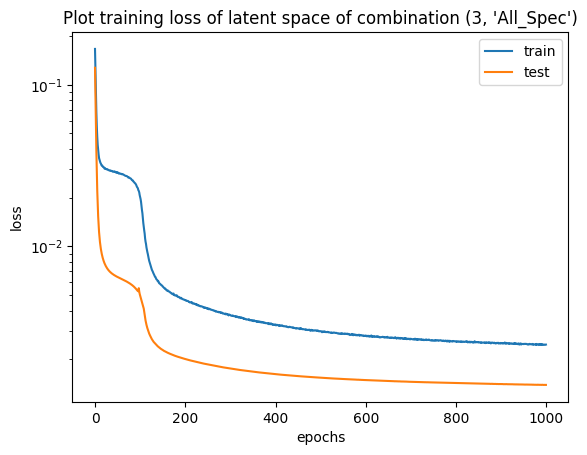

In [15]:
ens_latent_spaces.plot_ls_training_losses()

In [12]:
index=2

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")


#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,test_instance.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 

ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="")

Original class: [3]
Predicted class: [3]
Modality: 1vAll_Spec
Starting generation of counterfactuals 

The predicted class from MBB is [3]

Generation of counterfactual class ALL


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.44s/it]


In [13]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
2  48.0       0.0       1.0      174.2       84.6        26.1       86.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
2     121.0       38.5                      3.0            26.0          190.0

In [26]:
counterfactuals=ris["All"]["counterfactuals"]
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)


print(f"Probabilities: {results['prob']}")
print(f"Distances: {results['dist']}")

app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']
app

Probabilities: [0.9559089  0.99840885 0.9983303  0.9971324  0.99891675]
Distances: [ 15.83333333  27.26031915  30.95258471  41.70506564 127.14987329]


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7         3.5       85.0   
2  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
3  54.0       1.0       0.0      160.3       52.7        27.8       40.0   
4  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     159.0       30.0                     13.4             0.0   
1     159.0       30.0                     -8.5            19.0   
2     159.0        0.0                     -8.5            19.0   
3     159.0       30.0                     -8.5            19.0   
4     159.0       30.0                     -8.5            19.0   

   broad jump_cm  class        dist      prob  
0          151.0      3   15.833333  0.955909  
1          151.0      3   27.260319  0.998409  
2          151.0      3   30.952585  0.998330  
3          151.0      3   41.705066  0.997132  
4            0.0      3  127.149873  0.998917

## Execute testing on 1000 random test samples (stratify)

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test_set.iloc[:,:-1], test_set.iloc[:,-1], test_size=1000, stratify=test_set.iloc[:,-1], random_state=42)
sampled_test_set=pd.concat([X_test_2,y_test_2],axis=1)
sampled_test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3639  51.0     False      True      172.8       65.7        20.4       83.0   
2362  52.0      True     False      159.3       54.4        24.0       74.0   
2071  44.0     False      True      168.2       71.6        17.7       86.0   
1716  23.0      True     False      165.6       64.8        25.0       79.0   
2784  45.0     False      True      166.9       68.2        24.4       77.0   
...    ...       ...       ...        ...        ...         ...        ...   
19    28.0     False      True      176.4       86.0         9.3       83.0   
101   37.0     False      True      167.7       77.3        27.8      102.0   
831   37.0      True     False      178.2       74.9        23.8       77.0   
976   22.0      True     False      168.6       71.0        33.9       77.0   
2384  27.0      True     False      158.8       47.7        26.7       80.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3639     111.0       35.1                      3.7            20.0   
2362     126.0       27.1                     22.8            22.0   
2071     144.0       49.1                     15.4            51.0   
1716     127.0       30.6                     19.6            39.0   
2784     141.0       47.6                     16.0            50.0   
...        ...        ...                      ...             ...   
19       140.0       46.6                     23.4            62.0   
101      146.0       49.1                     15.6            57.0   
831      128.0       44.7                     22.3            46.0   
976      128.0       27.0                     30.6            30.0   
2384     127.0       20.3                     14.0            21.0   

      broad jump_cm  class  
3639          194.0      3  
2362          156.0      1  
2071          214.0      0  
1716          205.0      1  
2784          198.0      0  
...             ...    ...  
19            239.0      0  
101           226.0      0  
831           191.0      3  
976           212.0      1  
2384          144.0      3  

[1000 rows x 13 columns]

In [28]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,sampled_test_set.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 
ris=ens_latent_spaces.execute_testing_on_data("t1vAll_Spec",sampled_test_set,change_f,max_f,filtering_mode="",debug=False)

Processing test instances:   0%|          | 0/1000 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.86s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.46s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.14s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]

100%|██████████████████

# Mode Allv1

In [8]:
train_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Train.csv")
test_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Test.csv")

X_train=train_set.iloc[:,:-1].astype(np.float64)
X_test=test_set.iloc[:,:-1].astype(np.float64)
y_train=train_set.iloc[:,-1]
y_test=test_set.iloc[:,-1]

In [9]:
ens_latent_spaces=MultiClass_CP_ILS(bbox,train_set,test_set,bbox_chosen,"class",mode="Allv1")

Target class: class
Class values are: [0 1 2 3]
Numerical indexes: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Categorical indexes: [1, 2]
[[0], [1, 2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

Modality:  Allv1
Preparation of datasets for combination (0, 'All')
Preparation of datasets for combination (1, 'All')
Preparation of datasets for combination (2, 'All')
Preparation of datasets for combination (3, 'All')


In [10]:
ens_latent_spaces.load_latent_spaces(LS_PATH+"Body_Perf_XGB_generated_lantent_spaces1VAll.pkl")

Latent space loaded from generated_lantent_spaces1VAll.pkl


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
2467  61.0      True     False      161.2       59.2        22.8       92.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
2467     140.0       33.4                     26.2            37.0   

      broad jump_cm  class  
2467          178.0      0

In [13]:
index=1

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")


#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,test_instance.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 

ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="specific")

Original class: [2]
Predicted class: [2]
Modality: Allv1
Starting generation of counterfactuals using filtering_mode: specific 
'specific' considers only counterfactuals belonging to a specific class, different from the predicted outcome of the Multi-classification black-box model

The predicted class from MBB is [2]

Generation of counterfactual class 0 in (0, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.18s/it]


BBB Decoded y_pred: [0]
MBB Original y_pred: [1]
Plausible counterfactuals: 1
Discarded counterfactuals: 1

Generation of counterfactual class 1 in (1, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.49s/it]


BBB Decoded y_pred: [0 0 0 0]
MBB Original y_pred: [2 1 2 0]
Plausible counterfactuals: 2
Discarded counterfactuals: 1

Generation of counterfactual class 3 in (3, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.50it/s]

BBB Decoded y_pred: [0 0 0 0 0 0 0 0 0 0 0 0]
MBB Original y_pred: [2 2 2 2 3 3 2 3 3 3 3 3]
Plausible counterfactuals: 7


In [144]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
1  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
1     159.0       30.0                     13.4            19.0          151.0

In [145]:
counterfactuals=ris[3]["counterfactuals"]
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)

In [146]:
print(f"Probabilities: {results['prob']}")
print(f"Distances: {results['dist']}")

app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']
app

Probabilities: [0.9656636  0.9562916  0.967773   0.97769517 0.9982153  0.9970419
 0.9459343 ]
Distances: [ 24.09817882  33.9218874   33.9218874   37.20401711  43.8634244
  46.44829862 121.04005306]


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
1  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
2  54.0       1.0       0.0      160.3       52.7        27.8      121.0   
3  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
4  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
5  54.0       1.0       0.0      160.3       52.7        27.8       85.0   
6  54.0       1.0       0.0      160.3       52.7        27.8       85.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     159.0       30.0                     35.2             0.0   
1     195.0       30.0                     13.4             0.0   
2     159.0       30.0                     13.4             0.0   
3     159.0       70.4                     13.4             0.0   
4     195.0       30.0                    -25.0            19.0   
5     159.0       70.4                    -25.0            19.0   
6     159.0       30.0                     13.4             0.0   

   broad jump_cm  class        dist      prob  
0          151.0      3   24.098179  0.965664  
1          151.0      3   33.921887  0.956292  
2          151.0      3   33.921887  0.967773  
3          151.0      3   37.204017  0.977695  
4          151.0      3   43.863424  0.998215  
5          151.0      3   46.448299  0.997042  
6          295.0      3  121.040053  0.945934

In [147]:
index=1202

test_instance=test_set.iloc[index:index+1,:-1]
class_test_instance=test_set.iloc[index:index+1,-1]

print(f"Original class: {class_test_instance.values}")
y_pred=bbox.predict(test_instance)

print(f"Predicted class: {y_pred}")
ris=ens_latent_spaces.generate_counterfactuals(test_instance,change_f,max_f,counter_classes=-1,filtering_mode="plausible")

Original class: [3]
Predicted class: [3]
Modality: Allv1
Starting generation of counterfactuals using filtering_mode: plausible 
'plausible' considers any counterfactuals belonging to classes different from the predicted outcome of the Multi-classification black-box model

The predicted class from MBB is [3]

Generation of counterfactual class 0 in (0, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]


BBB Decoded y_pred: [0 0]
MBB Original y_pred: [0 0]
Plausible counterfactuals: 2
Generation of counterfactual class 1 in (1, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.56it/s]


BBB Decoded y_pred: [0 0 0 0]
MBB Original y_pred: [3 3 1 3]
Plausible counterfactuals: 1
Generation of counterfactual class 2 in (2, 'All')


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]

BBB Decoded y_pred: [0 0 0 0]
MBB Original y_pred: [3 3 3 3]
Plausible counterfactuals: 0


In [133]:
test_instance.astype(np.float64)

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
1202  25.0       0.0       1.0      172.2       65.1        17.1       79.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
1202     137.0       27.8                     17.2            30.0   

      broad jump_cm  
1202          203.0

In [134]:
counterfactuals=ris[0]["counterfactuals"]
results=ens_latent_spaces.execute_ranking_of_counterfactuals(test_instance,counterfactuals, ranking="proximity", group_by_class=False, top_k=-1)

In [135]:
print(f"Probabilities: {results['prob']}")
print(f"Distances: {results['dist']}")

app=results["counterfactuals"].copy()

app["class"]=results['class']
app["dist"]=results['dist']
app["prob"]=results['prob']
app

Probabilities: [0.5968343  0.58294064]
Distances: [ 81.28242943 145.90912316]


age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
0  25.0       0.0       1.0      172.2       65.1        17.1        0.0   
1  25.0       0.0       1.0      172.2       65.1        17.1       79.0   

   systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     137.0        0.0                     17.2            80.0   
1     137.0       27.8                    185.0            80.0   

   broad jump_cm  class        dist      prob  
0          203.0      0   81.282429  0.596834  
1          203.0      0  145.909123  0.582941

## Execute testing on 1000 random test samples (stratify)

In [162]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test_set.iloc[:,:-1], test_set.iloc[:,-1], test_size=1000, stratify=test_set.iloc[:,-1], random_state=42)
sampled_test_set=pd.concat([X_test_2,y_test_2],axis=1)
sampled_test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3639  51.0     False      True      172.8       65.7        20.4       83.0   
2362  52.0      True     False      159.3       54.4        24.0       74.0   
2071  44.0     False      True      168.2       71.6        17.7       86.0   
1716  23.0      True     False      165.6       64.8        25.0       79.0   
2784  45.0     False      True      166.9       68.2        24.4       77.0   
...    ...       ...       ...        ...        ...         ...        ...   
19    28.0     False      True      176.4       86.0         9.3       83.0   
101   37.0     False      True      167.7       77.3        27.8      102.0   
831   37.0      True     False      178.2       74.9        23.8       77.0   
976   22.0      True     False      168.6       71.0        33.9       77.0   
2384  27.0      True     False      158.8       47.7        26.7       80.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3639     111.0       35.1                      3.7            20.0   
2362     126.0       27.1                     22.8            22.0   
2071     144.0       49.1                     15.4            51.0   
1716     127.0       30.6                     19.6            39.0   
2784     141.0       47.6                     16.0            50.0   
...        ...        ...                      ...             ...   
19       140.0       46.6                     23.4            62.0   
101      146.0       49.1                     15.6            57.0   
831      128.0       44.7                     22.3            46.0   
976      128.0       27.0                     30.6            30.0   
2384     127.0       20.3                     14.0            21.0   

      broad jump_cm  class  
3639          194.0      3  
2362          156.0      1  
2071          214.0      0  
1716          205.0      1  
2784          198.0      0  
...             ...    ...  
19            239.0      0  
101           226.0      0  
831           191.0      3  
976           212.0      1  
2384          144.0      3  

[1000 rows x 13 columns]

In [163]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,sampled_test_set.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 
ris=ens_latent_spaces.execute_testing_on_data("tAll_v1",sampled_test_set,change_f,max_f,filtering_mode="plausible",debug=False)

Processing test instances:   0%|          | 0/1000 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.68s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.01s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.09s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.42s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.82s/it]

100%|██████████████████

In [15]:
test_set=pd.read_csv(TEST_PATH+"BodyPerformance/XGB/testset_tAll_v1.csv")
counterfactuals_set=pd.read_csv(TEST_PATH+"BodyPerformance/XGB/counterfactualset_tAll_v1.csv")
res_set=pd.read_csv(TEST_PATH+"BodyPerformance/XGB/results_tAll_v1.csv")

In [16]:
res_set

ID_TEST  orig_test_class  mbbox_test_class_pred  counter_class_desired  \
0            1                3                      3                      0   
1            1                3                      3                      1   
2            1                3                      3                      1   
3            1                3                      3                      1   
4            1                3                      3                      1   
...        ...              ...                    ...                    ...   
16165     1000                3                      2                      1   
16166     1000                3                      2                      3   
16167     1000                3                      2                      3   
16168     1000                3                      2                      3   
16169     1000                3                      2                      3   

       ID_COUNTER  bbbox_counter_class_pred  mbbox_counter_class_pred  \
0             1.0                       0.0                       0.0   
1             2.0                       0.0                       3.0   
2             3.0                       0.0                       0.0   
3             4.0                       0.0                       2.0   
4             5.0                       0.0                       0.0   
...           ...                       ...                       ...   
16165     16130.0                       0.0                       2.0   
16166     16131.0                       1.0                       2.0   
16167     16132.0                       1.0                       1.0   
16168     16133.0                       1.0                       2.0   
16169     16134.0                       1.0                       2.0   

       mmbox_counter_class_prob  counter_distance  
0                        0.7802          159.1420  
1                        0.4863          195.5472  
2                        0.8248          114.6979  
3                        0.5991           26.1871  
4                        0.8828          195.9357  
...                         ...               ...  
16165                    0.7733          126.0272  
16166                    0.7122          127.3738  
16167                    0.4890           51.4423  
16168                    0.7246           81.8578  
16169                    0.6462          116.0041  

[16170 rows x 9 columns]

# Mode All_Specv1

In [20]:
train_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Train.csv")
test_set=pd.read_csv(DS_PATH+"/BodyPerformance/bodyPerformance_Test.csv")

X_train=train_set.iloc[:,:-1].astype(np.float64)
X_test=test_set.iloc[:,:-1].astype(np.float64)
y_train=train_set.iloc[:,-1]
y_test=test_set.iloc[:,-1]

In [18]:
ens_latent_spaces=MultiClass_CP_ILS(bbox,train_set,test_set,bbox_chosen,"class",mode="All_Specv1")

Target class: class
Class values are: [0 1 2 3]
Numerical indexes: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Categorical indexes: [1, 2]
[[0], [1, 2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

Modality:  All_Specv1
Preparation of datasets for combination (0, 'All_Spec')
Preparation of datasets for combination (1, 'All_Spec')
Preparation of datasets for combination (2, 'All_Spec')
Preparation of datasets for combination (3, 'All_Spec')


In [19]:
ens_latent_spaces.load_latent_spaces(LS_PATH+"Body_Perf_XGB_generated_lantent_spaces1VAll_Spec.pkl")

Latent space loaded from ./MultiClass/LatentSpaces/Body_Perf_XGB_generated_lantent_spaces1VAll_Spec.pkl


In [11]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test_set.iloc[:,:-1], test_set.iloc[:,-1], test_size=1000, stratify=test_set.iloc[:,-1], random_state=42)
sampled_test_set=pd.concat([X_test_2,y_test_2],axis=1)
sampled_test_set

age  gender_F  gender_M  height_cm  weight_kg  body fat_%  diastolic  \
3639  51.0     False      True      172.8       65.7        20.4       83.0   
2362  52.0      True     False      159.3       54.4        24.0       74.0   
2071  44.0     False      True      168.2       71.6        17.7       86.0   
1716  23.0      True     False      165.6       64.8        25.0       79.0   
2784  45.0     False      True      166.9       68.2        24.4       77.0   
...    ...       ...       ...        ...        ...         ...        ...   
19    28.0     False      True      176.4       86.0         9.3       83.0   
101   37.0     False      True      167.7       77.3        27.8      102.0   
831   37.0      True     False      178.2       74.9        23.8       77.0   
976   22.0      True     False      168.6       71.0        33.9       77.0   
2384  27.0      True     False      158.8       47.7        26.7       80.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
3639     111.0       35.1                      3.7            20.0   
2362     126.0       27.1                     22.8            22.0   
2071     144.0       49.1                     15.4            51.0   
1716     127.0       30.6                     19.6            39.0   
2784     141.0       47.6                     16.0            50.0   
...        ...        ...                      ...             ...   
19       140.0       46.6                     23.4            62.0   
101      146.0       49.1                     15.6            57.0   
831      128.0       44.7                     22.3            46.0   
976      128.0       27.0                     30.6            30.0   
2384     127.0       20.3                     14.0            21.0   

      broad jump_cm  class  
3639          194.0      3  
2362          156.0      1  
2071          214.0      0  
1716          205.0      1  
2784          198.0      0  
...             ...    ...  
19            239.0      0  
101           226.0      0  
831           191.0      3  
976           212.0      1  
2384          144.0      3  

[1000 rows x 13 columns]

In [12]:
#Set fixed parameters 

#The set of changable feature
change_f=list(range(5,sampled_test_set.shape[1])) # set fixed "age	gender_F	gender_M	height_cm	weight_kg"

#The number of feature that can be changed among the changable one
max_f=len(change_f) 
ris=ens_latent_spaces.execute_testing_on_data("tAll_Specv1",sampled_test_set,change_f,max_f,filtering_mode="plausible",debug=False)

Processing test instances:   0%|          | 0/1000 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.05s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.56s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.14it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.48it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.71s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.25s/it]

100%|██████████████████

In [ ]:
##PROVE INIZIALI